In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, f_oneway

# Load dataset
df = pd.read_csv("StudentsPerformance.csv")

Dataset Overview:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None


Statistical Summary:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


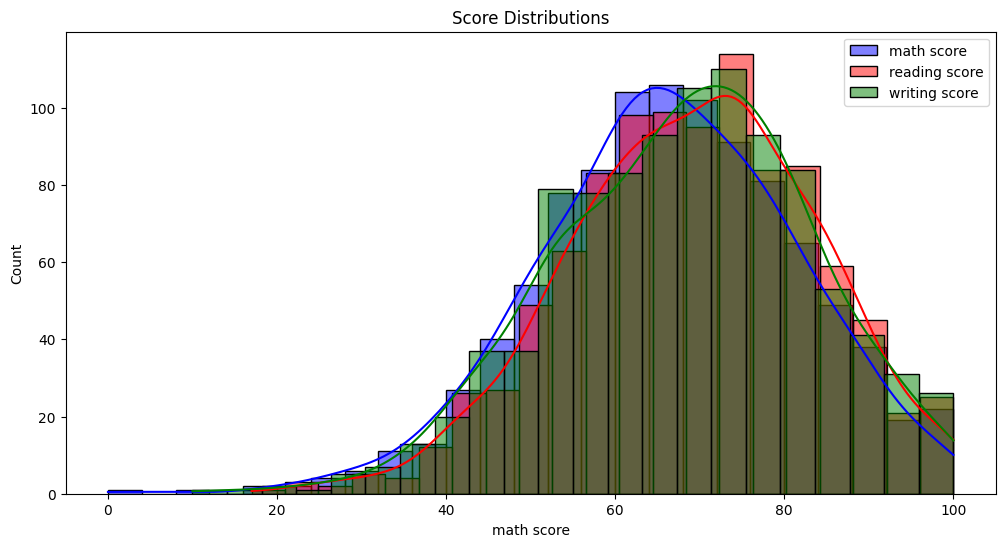


Correlation Matrix of Scores:


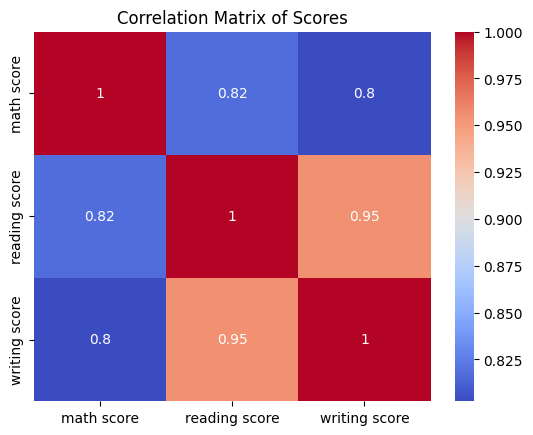


ANOVA Test Results:
gender: p-value = 0.00000
race/ethnicity: p-value = 0.00000
parental level of education: p-value = 0.00001
lunch: p-value = 0.00000
test preparation course: p-value = 0.00000

Model Evaluation:
Mean Squared Error: 0.1266719775854712
R2 Score: 0.8804332983749563


In [4]:
def explore_data():
    """Perform exploratory data analysis."""
    print("Dataset Overview:")
    display(df.head())
    print("\nDataset Info:")
    display(df.info())
    print("\nStatistical Summary:")
    display(df.describe())
    
    # Visualizing score distributions
    plt.figure(figsize=(12, 6))
    for col, color in zip(['math score', 'reading score', 'writing score'], ['blue', 'red', 'green']):
        sns.histplot(df[col], kde=True, color=color, label=col)
    plt.legend()
    plt.title("Score Distributions")
    plt.show()

def statistical_analysis():
    """Analyze key factors affecting performance."""
    print("\nCorrelation Matrix of Scores:")
    correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix of Scores")
    plt.show()
    
    # ANOVA test for categorical variables
    categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
    print("\nANOVA Test Results:")
    for feature in categorical_features:
        groups = [df[df[feature] == cat]['math score'] for cat in df[feature].unique()]
        stat, p = f_oneway(*groups)
        print(f"{feature}: p-value = {p:.5f}")

def feature_engineering():
    """Feature engineering process."""
    df_encoded = df.copy()
    
    # One-hot encoding categorical variables
    categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_features, drop_first=True)
    
    # Scaling numerical variables
    scaler = StandardScaler()
    df_encoded[['math score', 'reading score', 'writing score']] = scaler.fit_transform(df_encoded[['math score', 'reading score', 'writing score']])
    
    return df_encoded

def build_model(df_encoded):
    """Build and evaluate a regression model."""
    X = df_encoded.drop(columns=['math score'])
    y = df_encoded['math score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print("\nModel Evaluation:")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))

# Run analysis
explore_data()
statistical_analysis()
df_encoded = feature_engineering()
build_model(df_encoded)
